In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../data/cleaned_texts_oct19_2016.tsv', sep='\t')
records = records[records.pub_year > 1999]
records = records[records.pub_year < 2017]

In [3]:
len(records)

2439593

In [4]:
records.head(1)

,Unnamed: 0,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,slug,canonical_city,canonical_country
17,20,102067289,imperio con imperialismola dinamica globalizad...,empire with imperialism,NaN,editorial de ciencias sociales,la habana,2004,NaN,eng,"havana,cuba",havana,cuba


In [5]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)

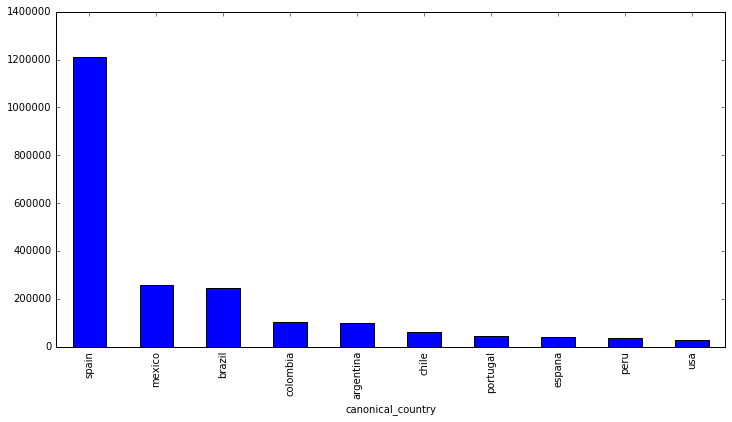

In [6]:
records.groupby('canonical_country').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].plot(kind="bar")

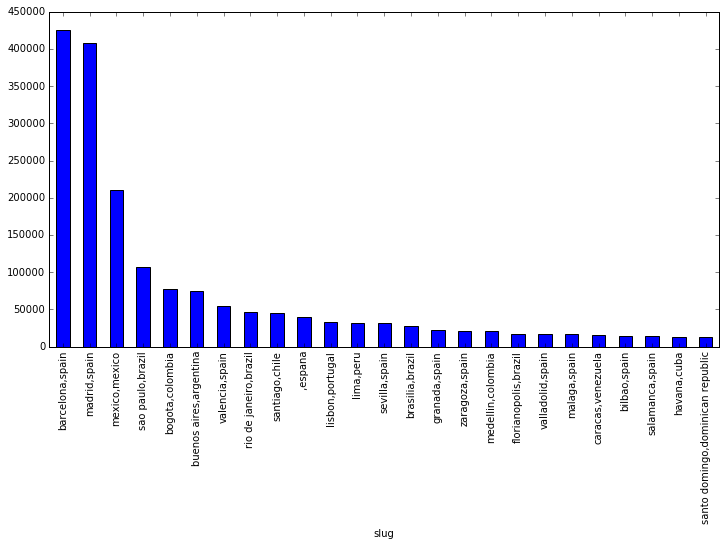

In [8]:
records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:25].plot(kind="bar")

## Global Publication By Year

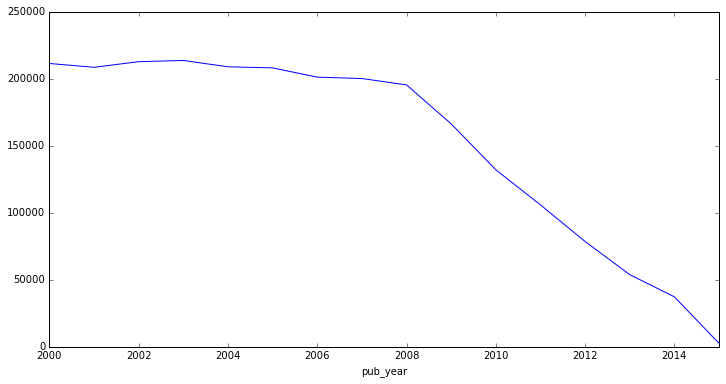

In [9]:
records.sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [10]:
# records[records.pub_year < 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [11]:
# records[records.pub_year > 1900].sort_values('pub_year').groupby('pub_year').count()['control_number'].plot()

In [12]:
top_slugs = records.groupby('slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:10].index
top_slugs

Index(['madrid,spain', 'barcelona,spain', 'mexico,mexico',
       'buenos aires,argentina', 'santiago,chile', 'rio de janeiro,brazil',
       'sao paulo,brazil', 'bogota,colombia', 'lisbon,portugal',
       'caracas,venezuela'],
      dtype='object', name='slug')

In [14]:
top_producers = records[records.slug.isin(top_slugs)]

In [15]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['slug', 'pub_year']).count()['control_number']

In [16]:
top_producer_df = pd.DataFrame({
    'madrid,spain': group_top_producers.ix['madrid,spain'],
    'barcelona,spain': group_top_producers.ix['barcelona,spain'],
    'mexico,mexico': group_top_producers.ix['mexico,mexico'],
    'buenos aires,argentina': group_top_producers.ix['buenos aires,argentina'],
    'santiago,chile': group_top_producers.ix['santiago,chile'],
    'rio de janeiro,brazil': group_top_producers.ix['rio de janeiro,brazil'],
    'sao paulo,brazil': group_top_producers.ix['sao paulo,brazil'],
    'bogota,colombia': group_top_producers.ix['bogota,colombia'],
    'lisbon,portugal': group_top_producers.ix['lisbon,portugal'],
    'caracas,venezuela': group_top_producers.ix['caracas,venezuela'],
})

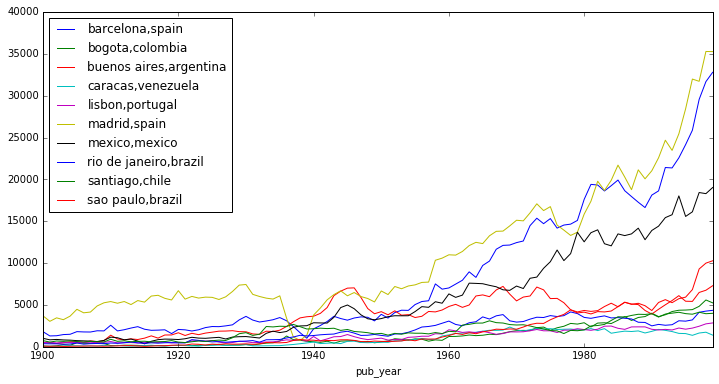

In [17]:
top_producer_df.plot()

## Same but with % of total

In [20]:
counted_by_year = records.sort_values('pub_year').groupby('pub_year').count()['control_number']

In [23]:
top_producer_df_percent = pd.DataFrame({
    'madrid,spain': group_top_producers.ix['madrid,spain'].divide(counted_by_year.values),
    'barcelona,spain': group_top_producers.ix['barcelona,spain'].divide(counted_by_year.values),
    'mexico,mexico': group_top_producers.ix['mexico,mexico'].divide(counted_by_year.values),
    'buenos aires,argentina': group_top_producers.ix['buenos aires,argentina'].divide(counted_by_year.values),
    'santiago,chile': group_top_producers.ix['santiago,chile'].divide(counted_by_year.values),
    'rio de janeiro,brazil': group_top_producers.ix['rio de janeiro,brazil'].divide(counted_by_year.values),
    'sao paulo,brazil': group_top_producers.ix['sao paulo,brazil'].divide(counted_by_year.values),
    'bogota,colombia': group_top_producers.ix['bogota,colombia'].divide(counted_by_year.values),
    'lisbon,portugal': group_top_producers.ix['lisbon,portugal'].divide(counted_by_year.values),
    'caracas,venezuela': group_top_producers.ix['caracas,venezuela'].divide(counted_by_year.values),
})

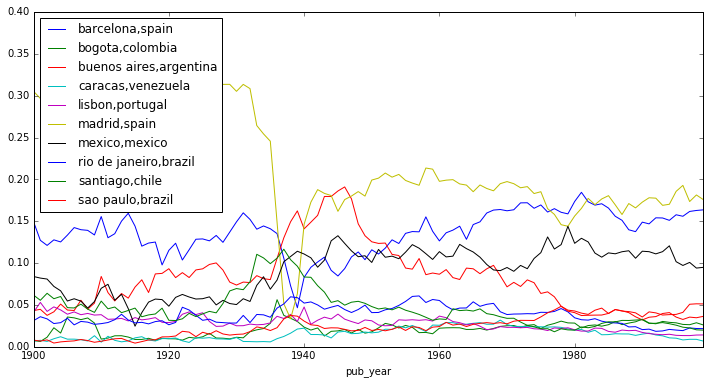

In [25]:
top_producer_df_percent.plot()